In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The Olympic medal data for this Data Analysis comes from [The Guardian](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data). It comprises records of all events held at the Olympic games between 1896 and 2012.

# Importing  the dataset

In [121]:
medals = pd.read_csv('../Datasets/all_medalists.csv')

In [122]:
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [123]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


# Grouping and aggregating

What is  the total number of USA medals awarded per edition?

In [124]:
Usa_edition_grouped = medals.loc[medals.NOC =='USA', :].groupby('Edition')

In [125]:
n = Usa_edition_grouped['Medal'].count()
n

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

At which edition of the olympics did USA win their higher number of medals?

In [126]:
n.idxmax()

1904

In [127]:
n.index

Int64Index([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
            1952, 1956, 1960, 1964, 1968, 1972, 1976, 1984, 1988, 1992, 1996,
            2000, 2004, 2008],
           dtype='int64', name='Edition')

Or we could have done it like this :

In [128]:
n[n==n.max()]

Edition
1904    394
Name: Medal, dtype: int64

Who were the Atheletes who won those medals

In [129]:
u = medals.loc[medals.NOC == 'USA']
u[u.Edition == 1904].Athlete.value_counts()

DOWNING, Burton            6
HEIDA, Anton               6
EYSER, George              6
MERZ, William              5
HURLEY, Marcus             5
DANIELS, Charles           5
KUNGLER, Frank             4
BILLINGTON, Edward         4
GAILEY, Francis            4
ROSE, Ralph                3
COOKE, Emma C.             3
BRYANT, George Philipp     3
LYDON, Joseph              3
EWRY, Ray                  3
HILLMAN, Harry             3
THOMPSON, William Henry    3
NEWTON, Arthur             3
LIGHTBODY, James           3
HOWELL, Matilda Scott      3
LENHART, Julius            3
VOIGT, Emil                3
HOGENSON, William          3
WILLIAMS, Robert           3
HAHN, Archie               3
POLLOCK, Jessie            3
FINNEGAN, George           2
LEONARD, Edgar Welch       2
TATE, Harry                2
ANDREWS, Arthur F.         2
BRADY, Joseph J.           2
                          ..
WEAR, Arthur Yancey        1
EVANS, Gwynne              1
REYBURN, Amadee            1
SMOOT, Clement

DOWNING Burton, HEIDA Anton and EYSER George were actually the most successful athletes at that edition with 6 medals each.

# Using .value_counts() for ranking

what are  the top 15 countries ranked by total number of medals won. 

In [130]:
# Select the 'NOC' column of medals: country_names
country_names = medals['NOC']

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


# Using .pivot_table() to count medals by type

Rather than ranking countries by total medals won and showing that list, we  want to see a bit more detail. We can use a pivot table to compute how many separate bronze, silver and gold medals each country won

In [131]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC',columns='Medal', values='Athlete', aggfunc='count')
counted.head()

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,4.0,2.0
ANZ,5.0,20.0,4.0
ARG,88.0,68.0,83.0


In [132]:
# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')
counted.head()

Medal,Bronze,Gold,Silver,totals
NOC,,,,
AFG,1.0,NaN,NaN,1.0
AHO,NaN,NaN,1.0,1.0
ALG,8.0,4.0,2.0,14.0
ANZ,5.0,20.0,4.0,29.0
ARG,88.0,68.0,83.0,239.0


In [133]:
# Sort counted by the 'totals' column
counted = counted.sort_values(by='totals', ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


# Applying .drop_duplicates()

What could be the difference between the **'Event_gender'** and **'Gender'** columns? We should be able to evaluate our guess by looking at the unique values of the pairs (Event_gender, Gender) in the data. In particular, we should not see something like (Event_gender='M', Gender='Women'). 

In [134]:
# Select columns: ev_gen
ev_gen = medals.loc[:,['Event_gender','Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


There is apparently an error in the data. We have this tuple (Event_gender = 'W', Gender = 'Men'). This mean that a man participate in a women event. This is certainly an error because that's not a possibility in the olympics

# Finding possible errors with .groupby() 

We will now use **.groupby(**) to continue our exploration. Our job is to group by 'Event_gender' and 'Gender' and count the rows.

In [135]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender','Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
print(medal_count_by_gender)

                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


Well, we now know that there is only one data point with that error. We're close to locating that data point

# Locating suspicious data

In [136]:
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W') & (medals.Gender =='Men')

# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]

# Print suspect
print(suspect)

         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze  


It looks like Joyce CHEPCHUMBA who won a Bronze medal, was the one with the error. A quick look on her [Wikipedia page](https://en.wikipedia.org/wiki/Joyce_Chepchumba) tell us she's a kenyan woman.So She was mistakenly registered as a man.

# Constructing alternative country rankings


## Using .nunique() to rank by distinct sports

In how many different sports, did the countries win, and which is the country with medals in most sports

In [137]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()
Nsports

NOC
AFG     1
AHO     1
ALG     3
ANZ     5
ARG    17
ARM     3
AUS    22
AUT    16
AZE     4
BAH     2
BAR     1
BDI     1
BEL    18
BER     1
BLR    11
BOH     3
BRA    11
BUL    15
BWI     1
CAN    22
CHI     6
CHN    24
CIV     1
CMR     3
COL     6
CRC     1
CRO    10
CUB    15
CZE     9
DEN    19
       ..
SRI     1
SUD     1
SUI    18
SUR     1
SVK     5
SWE    21
SYR     3
TAN     1
TCH    19
TGA     1
THA     3
TJK     2
TOG     1
TPE     6
TRI     3
TUN     3
TUR     6
UAE     1
UGA     2
UKR    16
URS    21
URU     5
USA    34
UZB     4
VEN     6
VIE     2
YUG    14
ZAM     2
ZIM     2
ZZX     6
Name: Sport, Length: 138, dtype: int64

In [138]:
# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

# Print the top 15 rows of Nsports
print(Nsports.head(15))


NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


 nterestingly, the USSR is not in the top 5 in this category, while the USA continues to remain on top. What could be the cause of this? We'll compare the medal counts of USA vs. USSR more closely

## Counting USA vs. USSR Cold War Olympic Sports

The Olympic competitions between 1952 and 1988 took place during the height of the Cold War between the United States of America (USA) & the Union of Soviet Socialist Republics (USSR). Let's  aggregate the number of distinct sports in which the USA and the USSR won medals during the Cold War years.

In [139]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = (medals.Edition >= 1952) & (medals.Edition <= 1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
print(Nsports)

NOC
URS    21
USA    20
Name: Sport, dtype: int64


 The USSR is actually higher than the US when you look only at the Olympic competitions between 1952 and 1988!

## Counting USA vs. USSR Cold War Olympic Medals

We want to see which country, the USA or the USSR, won the most medals consistently over the Cold War period.

In [140]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC',
values='Athlete', aggfunc='count')

medals_won_by_country.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
# Slice medals_won_by_country: cold_war_usa_usr_medals
cold_war_usa_usr_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

cold_war_usa_usr_medals

NOC,USA,URS
Edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0
1968,149.0,188.0
1972,155.0,211.0
1976,155.0,285.0
1980,NaN,442.0
1984,333.0,NaN


In [142]:
# Create most_medals 
most_medals = cold_war_usa_usr_medals.idxmax(axis='columns')

most_medals

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

In [143]:
print(most_medals.value_counts())

URS    8
USA    2
dtype: int64


Here, once again, the USSR comes out on top

# Reshaping DataFrames for visualization


## Visualizing USA Medal Counts by Edition: Line Plot

In [144]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year.head()

Edition  Medal 
1896     Bronze     2
         Gold      11
         Silver     7
1900     Bronze    14
         Gold      27
Name: Athlete, dtype: int64

In [145]:
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')
usa_medals_by_year.head()

Medal,Bronze,Gold,Silver
Edition,,,
1896,2,11,7
1900,14,27,14
1904,111,146,137
1908,15,34,14
1912,31,45,25


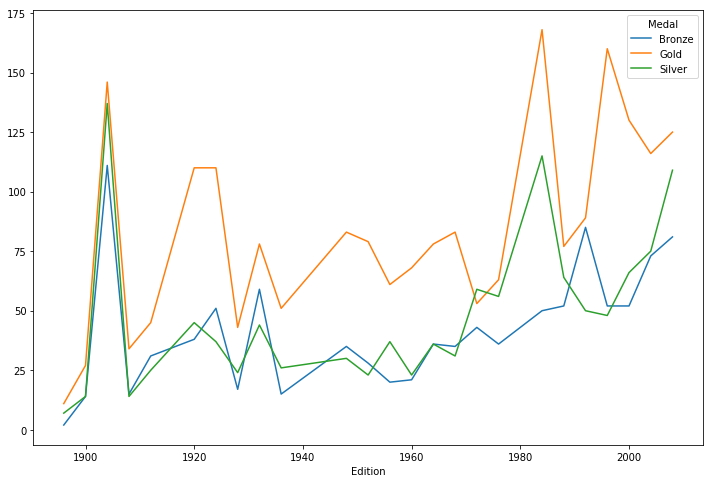

In [146]:
# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot(figsize=(12,8))
plt.show()

 It's difficult to gain too much insight from this visualization, however An area plot may be more helpful.

## Visualizing USA Medal Counts by Edition: Area Plot

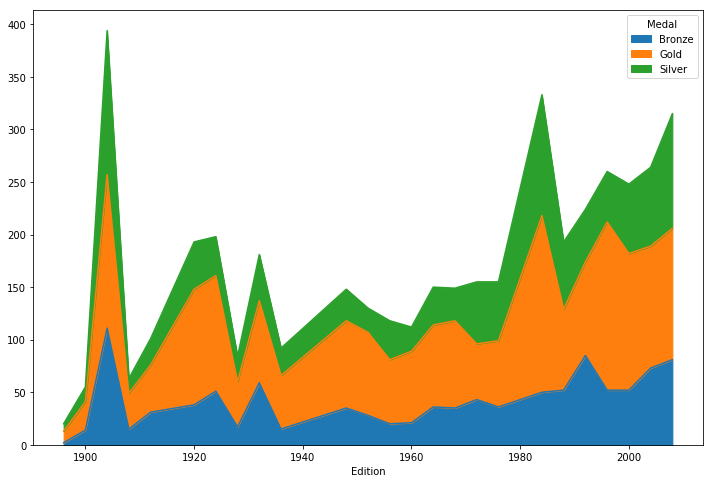

In [147]:
# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area(figsize=(12,8))
plt.show()

## Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medal

You may have noticed that the medals are ordered according to a lexicographic (dictionary) ordering: Bronze < Gold < Silver. However, you would prefer an ordering consistent with the Olympic rules: Bronze < Silver < Gold.

You can achieve this using Categorical types. In this final exercise, after redefining the 'Medal' column of the DataFrame medals, you will repeat the area plot from the previous exercise to see the new ordering.

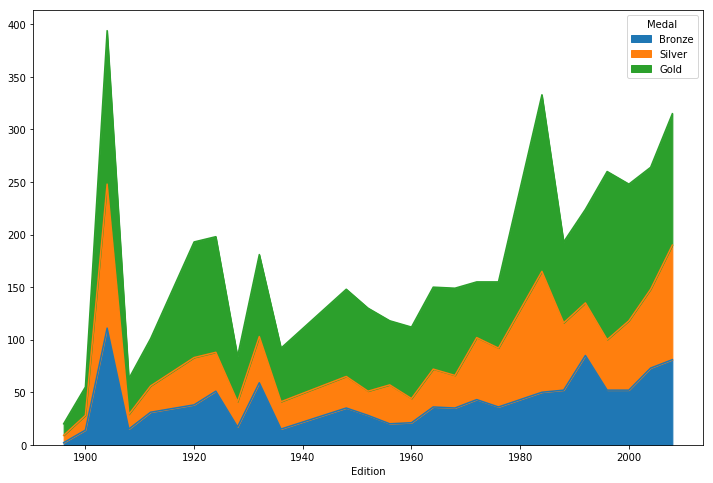

In [148]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values=medals.Medal, categories=['Bronze', 'Silver','Gold'], ordered=True)

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area(figsize=(12,8))
plt.show()
